In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming the data is stored in a CSV format
file_path = "ECG_Time_Features_100.csv"
df = pd.read_csv(file_path)

# Quick inspection of the data
print("Data Head:")
print(df.head())
print("\nData Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Check for null values
print("\nNull Values:")
print(df.isnull().sum())

# Rename ambiguous column names for easier processing
df.columns = [col.replace('"', '').replace('__', '_') for col in df.columns]

# Filter numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()



Data Head:
   value__quantile__q_0.9  value__quantile__q_0.6  value__quantile__q_0.4  \
0                0.088197               -0.014966               -0.031706   
1                0.154646               -0.028350               -0.050644   
2                0.135799               -0.026894               -0.043165   
3                0.188256               -0.015247               -0.038007   
4                0.113084               -0.012416               -0.025497   

   value__quantile__q_0.7  value__quantile__q_0.1  value__quantile__q_0.8  \
0               -0.002513               -0.058274                0.032038   
1               -0.011865               -0.077629                0.024123   
2               -0.007463               -0.067333                0.030549   
3                0.009945               -0.070534                0.048354   
4               -0.002573               -0.052509                0.020982   

   value__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql

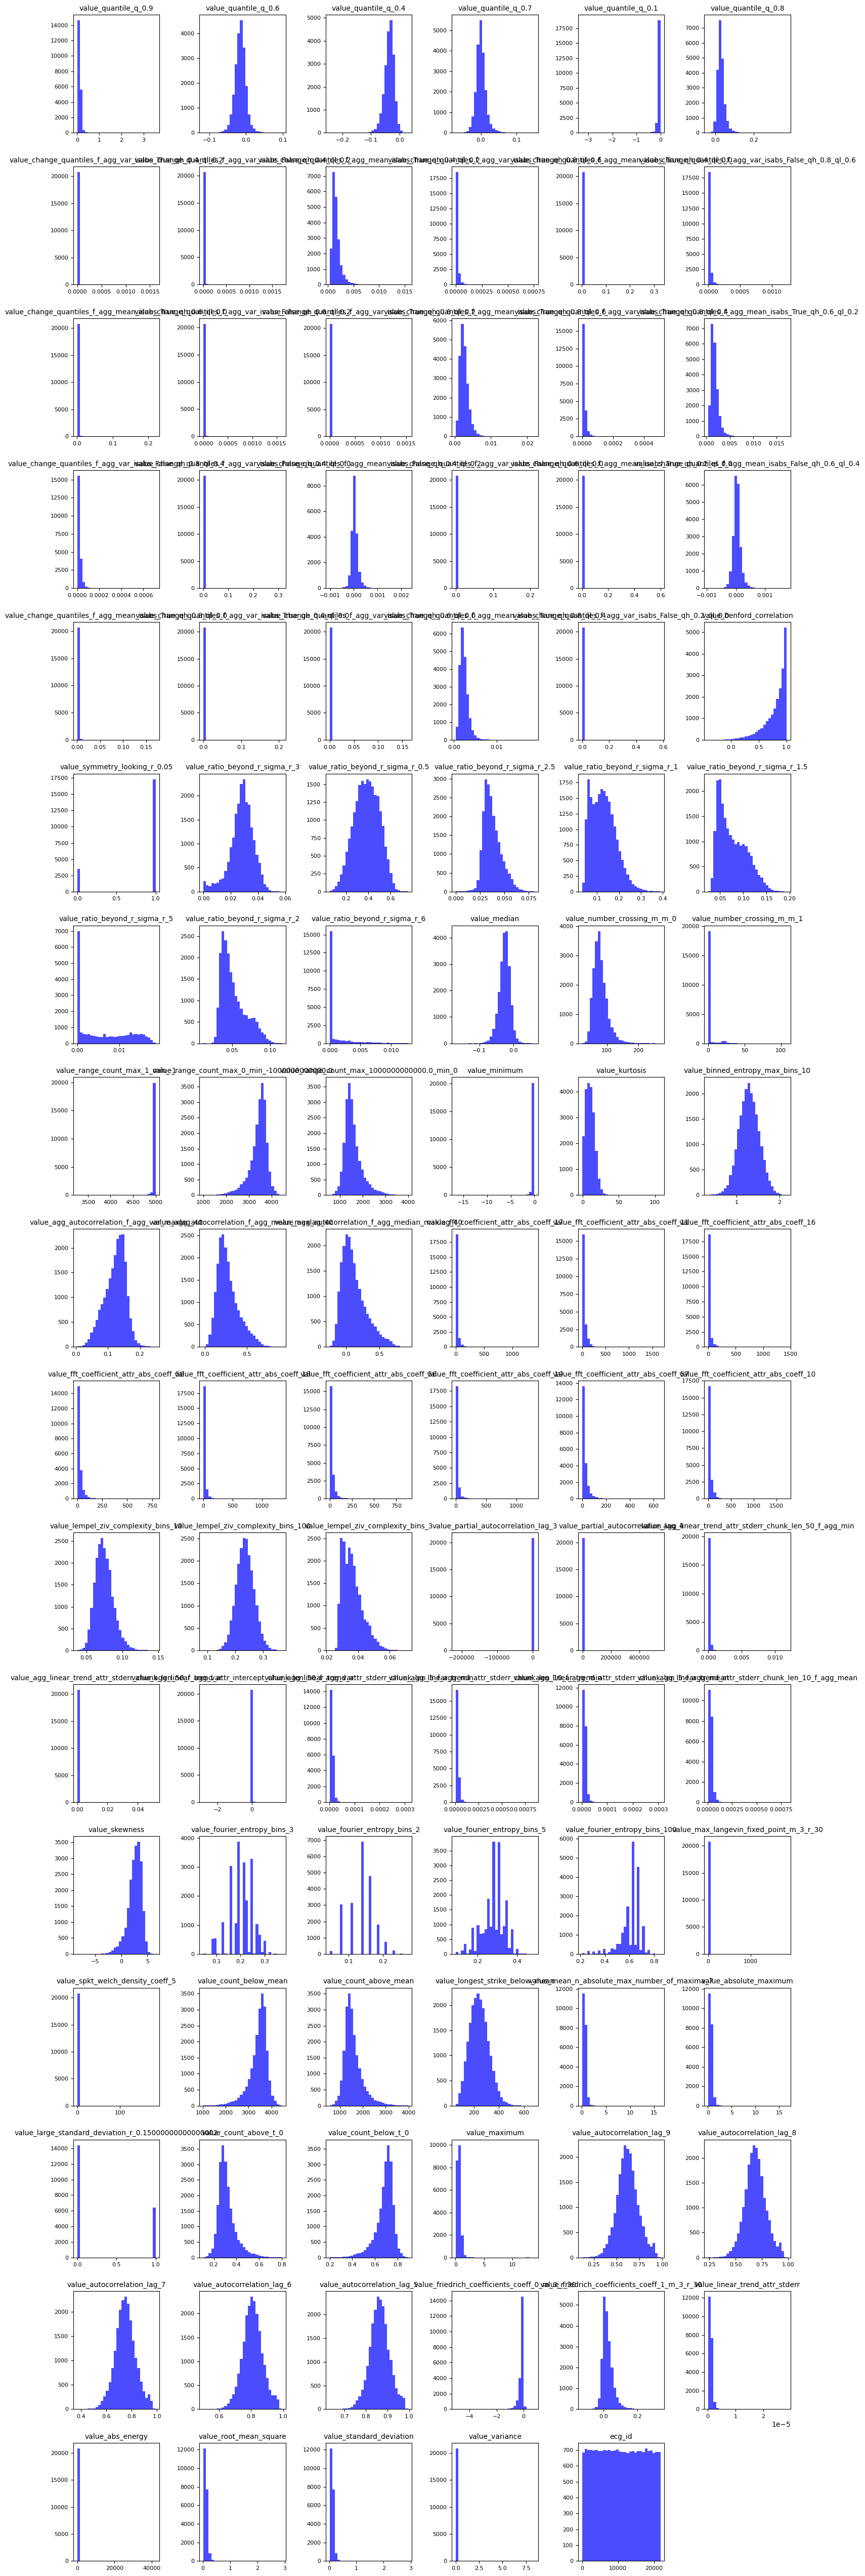

In [ ]:
import math


num_features = len(numeric_cols)
num_cols = 6  
num_rows = math.ceil(num_features / num_cols) 

# histograms 
plt.figure(figsize=(15, num_rows * 3))  #
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(df[col], bins=30, color='blue', alpha=0.7)
    plt.title(col, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout(h_pad=2, w_pad=2) 
plt.show()



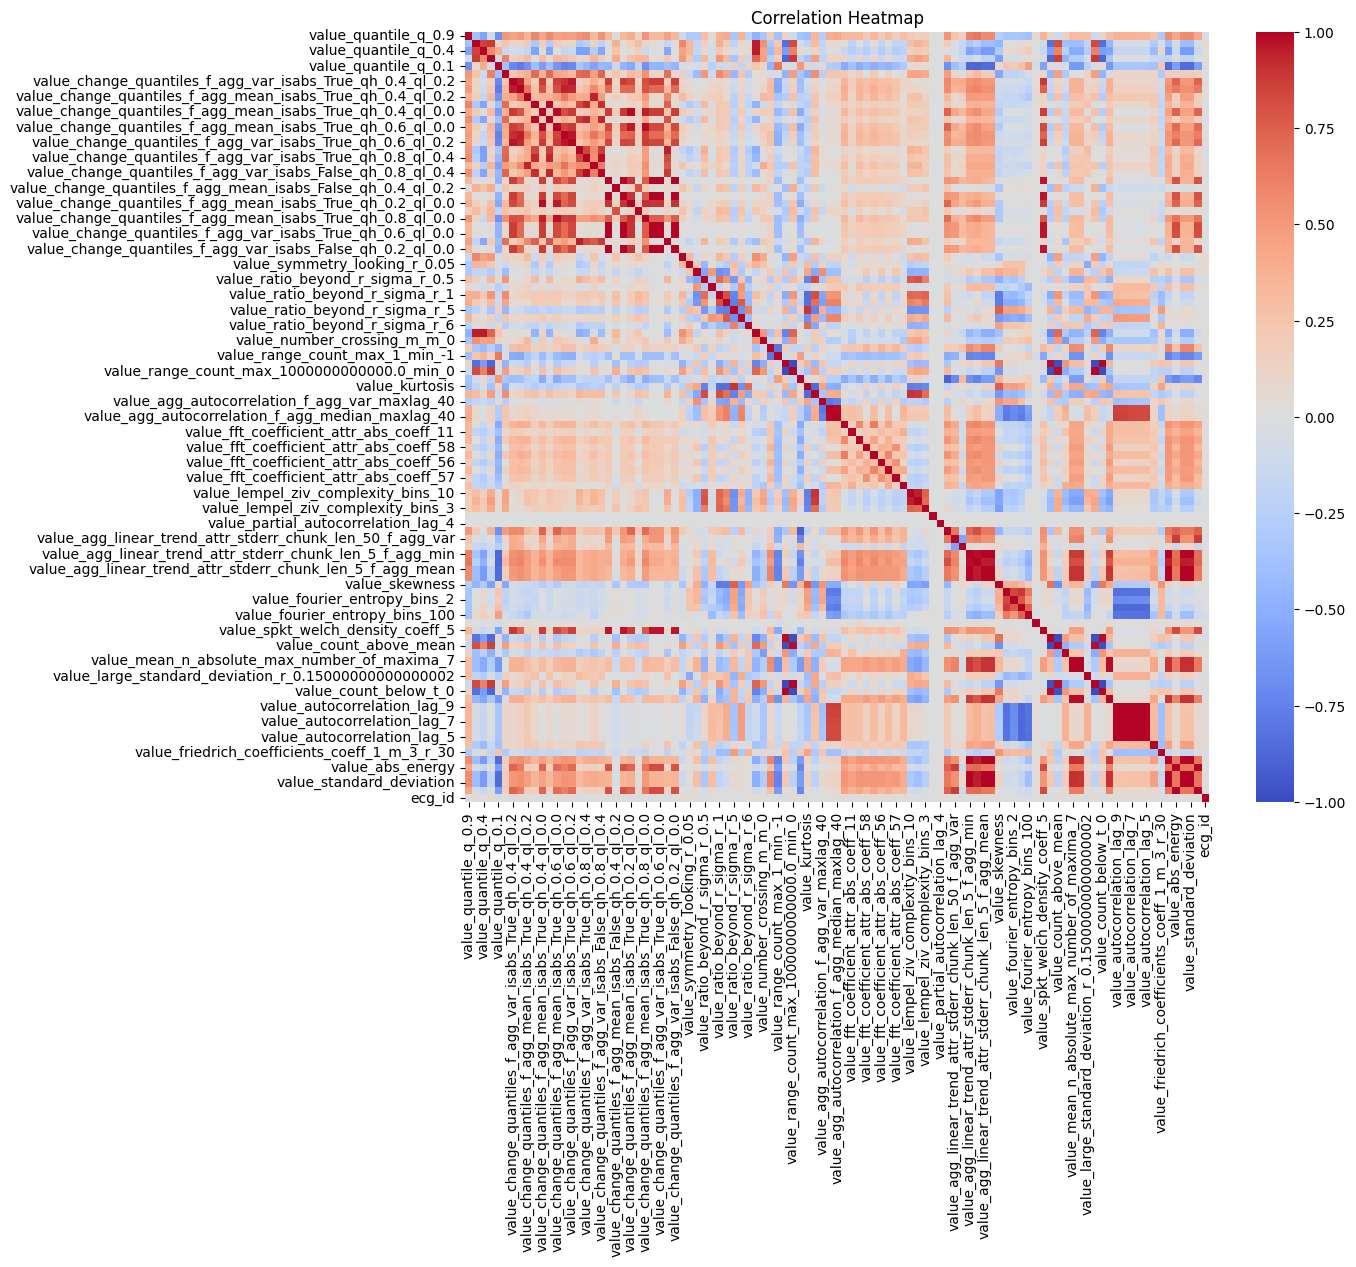

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()



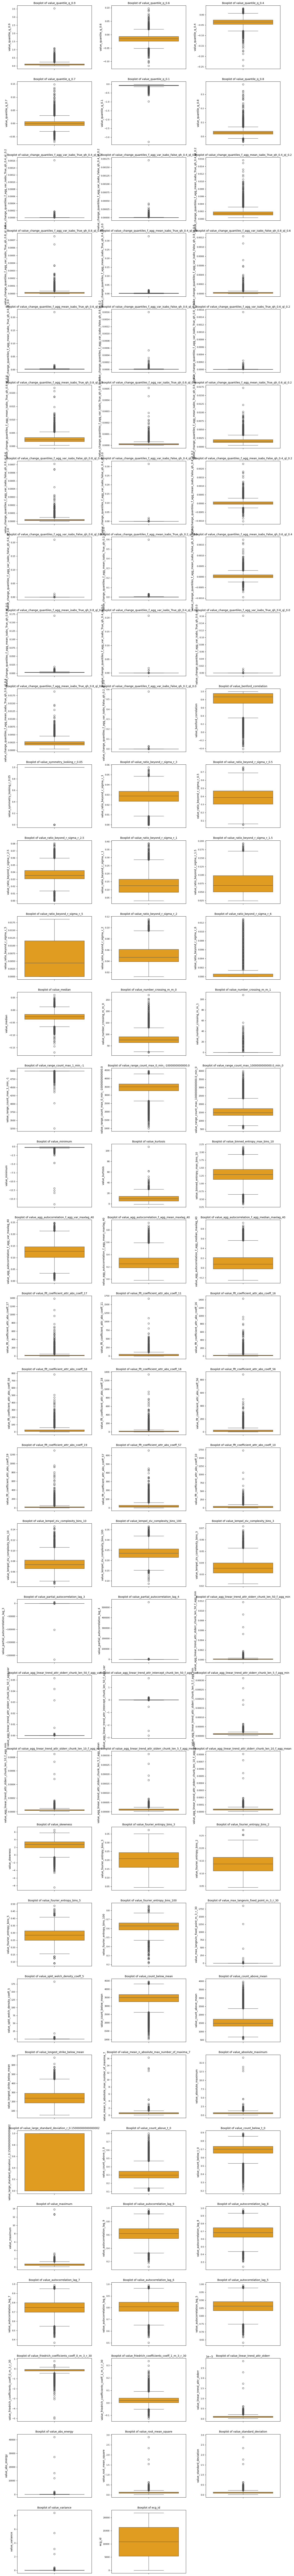

In [8]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of rows and columns dynamically
num_features = len(numeric_cols)
num_cols = 3  # Fixed number of columns for layout consistency
num_rows = math.ceil(num_features / num_cols)  # Calculate rows based on features

# Create the figure and subplots
plt.figure(figsize=(15, num_rows * 4))  # Adjust figure height dynamically
for i, col in enumerate(numeric_cols, 1):  # Loop through each feature
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df, y=col, color='orange')  # Boxplot for each feature
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

# Adjust layout to avoid overlap
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()
